# Instacart Online Grocery Basket Analysis

# 1. READING THE DATASET

In [3]:
!pip install kagglehub

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/instacart-online-grocery-basket-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/sujiitramurukeshan/.cache/kagglehub/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset/versions/1


In [7]:
import pandas as pd
import os# List downloaded files
files = os.listdir(path)
print("Dataset Files:", files)

Dataset Files: ['products.csv', 'orders.csv', 'order_products__train.csv', 'departments.csv', 'aisles.csv', 'order_products__prior.csv']


Above are the list of csv files related to this analysis.

In [10]:
# Load datasets
aisles = pd.read_csv(os.path.join(path, "aisles.csv"))
departments = pd.read_csv(os.path.join(path, "departments.csv"))
order_products_prior = pd.read_csv(os.path.join(path, "order_products__prior.csv"))
order_products_train = pd.read_csv(os.path.join(path, "order_products__train.csv"))
orders = pd.read_csv(os.path.join(path, "orders.csv"))
products = pd.read_csv(os.path.join(path, "products.csv"))

In [11]:
datasets = {"aisles": aisles, "departments": departments, "order_products_prior": order_products_prior,
            "order_products_train": order_products_train, "orders": orders, "products": products}


In [12]:
# Check if data loaded correctly
for name,df in datasets.items():
    print(f"\n{name} info:")
    print(df.info())
    print("\n")



aisles info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None



departments info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None



order_products_prior info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          in

Since Orders and Order_Product_Prior doesn't give details of the null values in the above, we explicitly checked the null values in all the datasets.

In [17]:
for name,df in datasets.items():
    print(f"\n{name} info:")
    print(df.head())
    print("\n")


aisles info:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation



departments info:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol



order_products_prior info:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0



order_products_train info:
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1

# 2. DATA TREATMENT: CLEANING AND FORMATTING

In [20]:
# Printing the shape of each dataset
for name, df in datasets.items():
    print(f"{name} shape: {df.shape}")

aisles shape: (134, 2)
departments shape: (21, 2)
order_products_prior shape: (32434489, 4)
order_products_train shape: (1384617, 4)
orders shape: (3421083, 7)
products shape: (49688, 4)


In [22]:
for name, df in datasets.items():
    print(f"\n{name} missing values:\n{df.isnull().sum()}")


aisles missing values:
aisle_id    0
aisle       0
dtype: int64

departments missing values:
department_id    0
department       0
dtype: int64

order_products_prior missing values:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

order_products_train missing values:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

orders missing values:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

products missing values:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


There are no null values in the datasets except for the orders dataset.

# 2.1 Null Values in Orders dataset
The column days_since_prior_order has missing values as they must be the first time customers. We have solved this by filling it with a value 0.

In [26]:
orders["days_since_prior_order"] = orders["days_since_prior_order"].fillna(0)

In [28]:
print(orders.isnull().sum())

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


# 2.2 Checking Duplicates

In [31]:
for name, df in datasets.items():
    print(f"{name} duplicate rows: {df.duplicated().sum()}")

aisles duplicate rows: 0
departments duplicate rows: 0
order_products_prior duplicate rows: 0
order_products_train duplicate rows: 0
orders duplicate rows: 0
products duplicate rows: 0


There is no duplicate data in our datasets.

# 2.3 Data Integration

## 2.3.1 Merging Datasets

We are merging the datasets for the analysis purpose.

In [37]:
# Merge products with aisles and departments
products = products.merge(aisles, on="aisle_id", how="left")
products = products.merge(departments, on="department_id", how="left")
print(f" Merging products, aisles, and departments completed")

# Merge order-product relationships (Concatenating prior & train)
order_products = pd.concat([order_products_prior, order_products_train])
print(f" Merging order-product datasets completed")

# Merge order_products with products
order_products = order_products.merge(products, on="product_id", how="left")
print(f" Merging order-products with products completed")

# Merge orders with order_products
orders = orders.merge(order_products, on="order_id", how="left")
print(f" Merging orders with order-products completed")

 Merging products, aisles, and departments completed
 Merging order-product datasets completed
 Merging order-products with products completed
 Merging orders with order-products completed


## 2.3.2 Checking and handling missing values

In [40]:
# Count missing values in each column
missing_values = orders.isnull().sum()

# Convert to DataFrame for better readability
missing_values_df = pd.DataFrame({"Column": missing_values.index, "Missing Values": missing_values.values})

# Filter only columns with missing values
missing_values_df = missing_values_df[missing_values_df["Missing Values"] > 0]

# Print missing values summary
print("Missing Values in Merged Dataset:")
print(missing_values_df)

Missing Values in Merged Dataset:
               Column  Missing Values
7          product_id           75000
8   add_to_cart_order           75000
9           reordered           75000
10       product_name           75000
11           aisle_id           75000
12      department_id           75000
13              aisle           75000
14         department           75000


In [42]:
missing_orders = orders[orders["product_id"].isnull()]
print("Sample of Orders Missing Product Details:")
print(missing_orders.head(10))  # Show 10 missing rows
print(f"Total Orders Missing Product Details: {len(missing_orders)}")

Sample of Orders Missing Product Details:
      order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
384    2774568        3     test            13          5                 15   
403     329954        4     test             6          3                 12   
464    1528013        6     test             4          3                 16   
1086   1376945       11     test             8          6                 11   
1161   1356845       12     test             6          1                 20   
1541   2161313       15     test            23          1                  9   
1612   1416320       16     test             7          0                 13   
2167   1735923       19     test            10          6                 17   
2190   1980631       20     test             5          1                 11   
2471    139655       22     test            16          5                  6   

      days_since_prior_order  product_id  add_to_cart_order  reordered  \
384

Upon closer inspection, we can see that there is something common for all records having missing values.
All of them have eval_set value as test. This is because these are the records for the machine learning algorithms to predicts. Since these records have missing values, we will be dropping them as they won't contribute towards further analysis.

In [45]:
# Drop rows where eval_set is "test"
orders = orders[orders["eval_set"] != "test"]

# Reset index after dropping rows
orders.reset_index(drop=True, inplace=True)

print("All rows with eval_set = 'test' have been removed.")
print(f"Remaining rows in dataset: {len(orders)}")

All rows with eval_set = 'test' have been removed.
Remaining rows in dataset: 33819106


In [46]:
# Checking whether any rows still have missing values
# Check for missing values in each column
missing_values = orders.isnull().sum()

# Print only columns that have missing values
print("Missing Values in Merged Dataset:")
for col, count in missing_values.items():
    if count > 0:
        print(f"{col}: {count}")

Missing Values in Merged Dataset:


No more missing values in the final dataset!

In [50]:
print(orders.head())
print(orders.info())


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2539329        1    prior             1          2                  8   
2   2539329        1    prior             1          2                  8   
3   2539329        1    prior             1          2                  8   
4   2539329        1    prior             1          2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0       196.0                1.0        0.0   
1                     0.0     14084.0                2.0        0.0   
2                     0.0     12427.0                3.0        0.0   
3                     0.0     26088.0                4.0        0.0   
4                     0.0     26405.0                5.0        0.0   

                              product_name  aisle_id  department_id  \
0                                     S

# 3. Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis

In [53]:
print(orders.describe())
print(orders["order_hour_of_day"].value_counts())
print(orders["order_dow"].value_counts())


           order_id       user_id  order_number     order_dow  \
count  3.381911e+07  3.381911e+07  3.381911e+07  3.381911e+07   
mean   1.710566e+06  1.029444e+05  1.713998e+01  2.737285e+00   
std    9.874008e+05  5.946733e+04  1.749829e+01  2.093296e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.554130e+05  5.143500e+04  5.000000e+00  1.000000e+00   
50%    1.710660e+06  1.026260e+05  1.100000e+01  3.000000e+00   
75%    2.565587e+06  1.544120e+05  2.400000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       3.381911e+07            3.381911e+07  3.381911e+07   
mean        1.343123e+01            1.066586e+01  2.557551e+04   
std         4.246149e+00            9.081234e+00  1.409770e+04   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            4.000000e+00  1.351900e+04   
50%         1.3000

From the above description of data, we can make following observations:
1. days_since_prior_order has values ranging between 0 to 30 where 0 stands for customer ordering for first time so they don't have any prior and 30 days i.e. a month is the maximum gap between 2 consecutive orders.
2. Most common window of placing an orders seems to be between 9 am to 5pm with over 21,000 orders each hour, highest being 2880853 at 10am and second being 11am with 2858813 orders
3. Day of the week with most orders is 0 i.e. Sunday. This may be because it is a holiday for most customers and they are ordering groceries for next few days.
4. Wednesday and Thursday have lesser orders compared to other days of week. This maybe because customers do no prefer placing orders midweek. Same is visualized below.

## Q1. Which days of the week are orders placed the most?

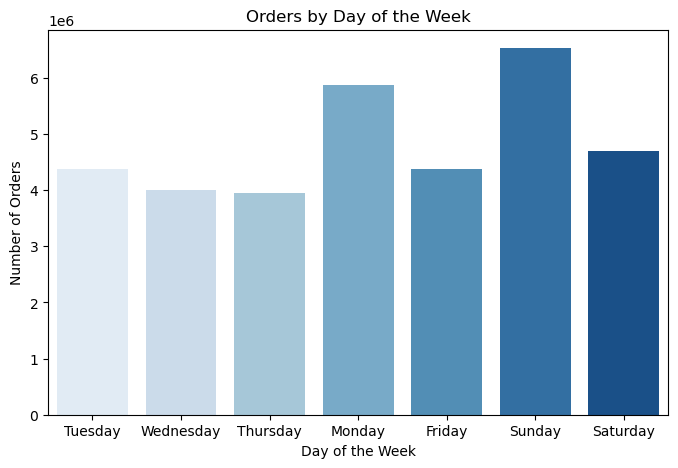

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Map the days of the week to actual names
days_of_week = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
                4: "Thursday", 5: "Friday", 6: "Saturday"}

orders["order_dow"] = orders["order_dow"].map(days_of_week)

plt.figure(figsize=(8, 5))
sns.countplot(data=orders, x="order_dow", hue="order_dow", palette="Blues", legend=False) 

plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.title("Orders by Day of the Week")
plt.show()

Day of the week with most orders is Sunday. This may be because it is a holiday for most customers and they are ordering groceries for next few days. Wednesday and Thursday have lesser orders compared to other days of week. This maybe because customers do no prefer placing orders midweek. Same is visualized below.

## Q2. At what time of the day are the orders placed the most?

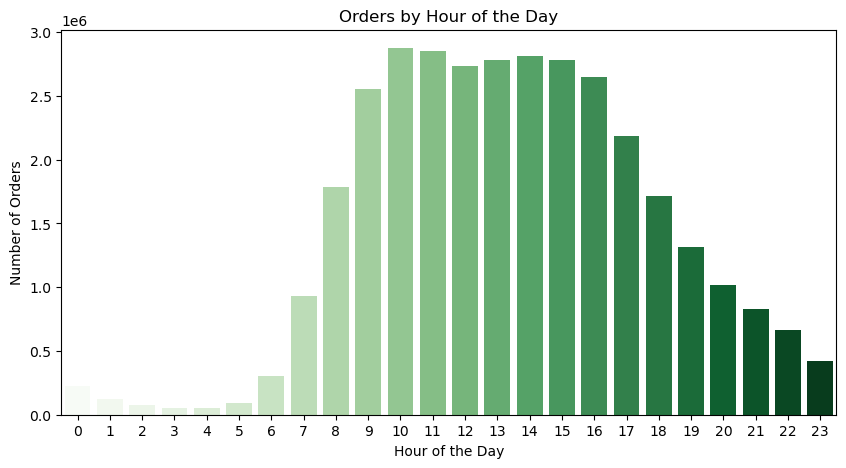

In [60]:
plt.figure(figsize=(10, 5))
sns.countplot(data=orders, x="order_hour_of_day", hue="order_hour_of_day", palette="Greens", legend=False)  

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Orders by Hour of the Day")
plt.show()

As we can see above, 9am to 5pm is the peak time for orders and least orders are placed during late night/early hours of morning from 12am to 6am.
So what kind of items are ordered that late at night?

## Q3. Which products are ordered late night/ early morning?

In [64]:
# Defining late-night/early morning hours (10 PM - 6 AM)
late_night_orders = orders[(orders["order_hour_of_day"] >= 22) | (orders["order_hour_of_day"] <= 6)]

# Count most frequently ordered products during late-night hours
late_night_products = (late_night_orders
                       .groupby("product_name")["order_id"]
                       .count()
                       .reset_index()
                       .rename(columns={"order_id": "order_count"})
                       .sort_values(by="order_count", ascending=False)
                       .head(10))  # Get top 10 products

# Display results
print("Top 10 Most Ordered Products Late at Night:")
print(late_night_products)

Top 10 Most Ordered Products Late at Night:
                 product_name  order_count
2918                   Banana        27714
2740   Bag of Organic Bananas        24288
25994    Organic Strawberries        17460
23221    Organic Baby Spinach        15832
24543    Organic Hass Avocado        13016
23189         Organic Avocado        10515
18051             Large Lemon         9143
34922            Strawberries         9113
26491      Organic Whole Milk         9019
25494     Organic Raspberries         8979


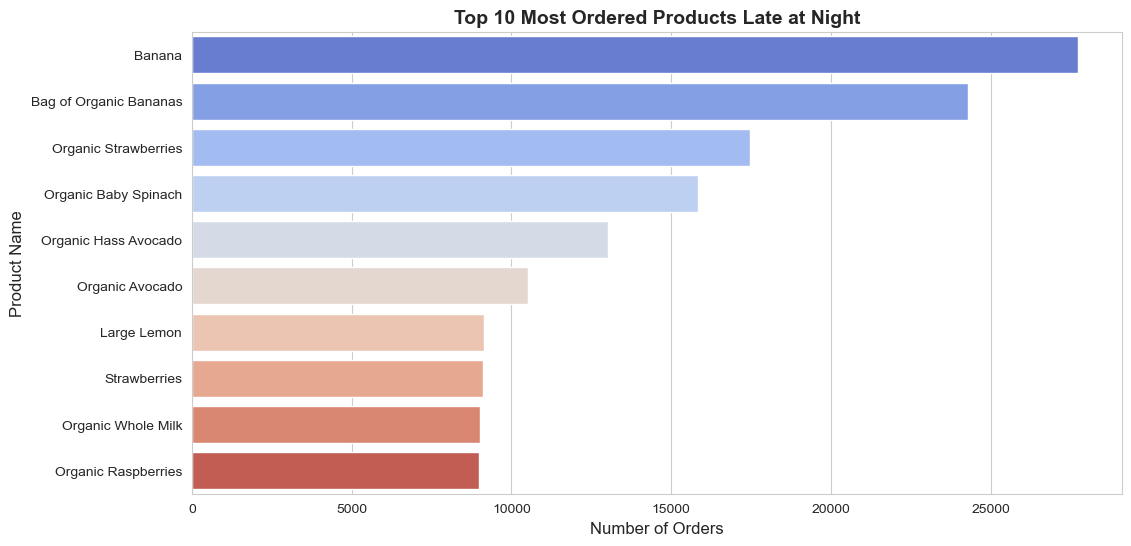

In [67]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Plot the Top 10 Most Ordered Products Late at Night
plt.figure(figsize=(12, 6))
sns.barplot(data=late_night_products, x="order_count", y="product_name", hue="product_name", palette="coolwarm", legend=False)

# Improve labels and title
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Most Ordered Products Late at Night", fontsize=14, fontweight='bold')

# Display the plot
plt.show()

We can see that most ordered item is banana taking up first 2 spots followed by strawberries taking up 2 spots in top 10 followed by avocados, etc.
Will there be a difference if we check the top 10 products ordered in the peak hours?

## Q4. Which products are ordered during remainder of day i.e. 7am to 9pm the peak hours?

In [71]:
# Defining late-night/early morning hours (7 AM - 9 PM)
peak_time_orders = orders[(orders["order_hour_of_day"] >= 7) | (orders["order_hour_of_day"] <= 9)]

# Count most frequently ordered products during late-night hours
peak_time_products = (peak_time_orders
                       .groupby("product_name")["order_id"]
                       .count()
                       .reset_index()
                       .rename(columns={"order_id": "order_count"})
                       .sort_values(by="order_count", ascending=False)
                       .head(10))  # Get top 10 products

# Display results
print("Top 10 Most Ordered Products During Peak Hours:")
print(peak_time_products)

Top 10 Most Ordered Products During Peak Hours:
                 product_name  order_count
3677                   Banana       491291
3472   Bag of Organic Bananas       394930
31923    Organic Strawberries       275577
28843    Organic Baby Spinach       251705
30300    Organic Hass Avocado       220877
28807         Organic Avocado       184224
22415             Large Lemon       160792
42908            Strawberries       149445
23422                   Limes       146660
32481      Organic Whole Milk       142813


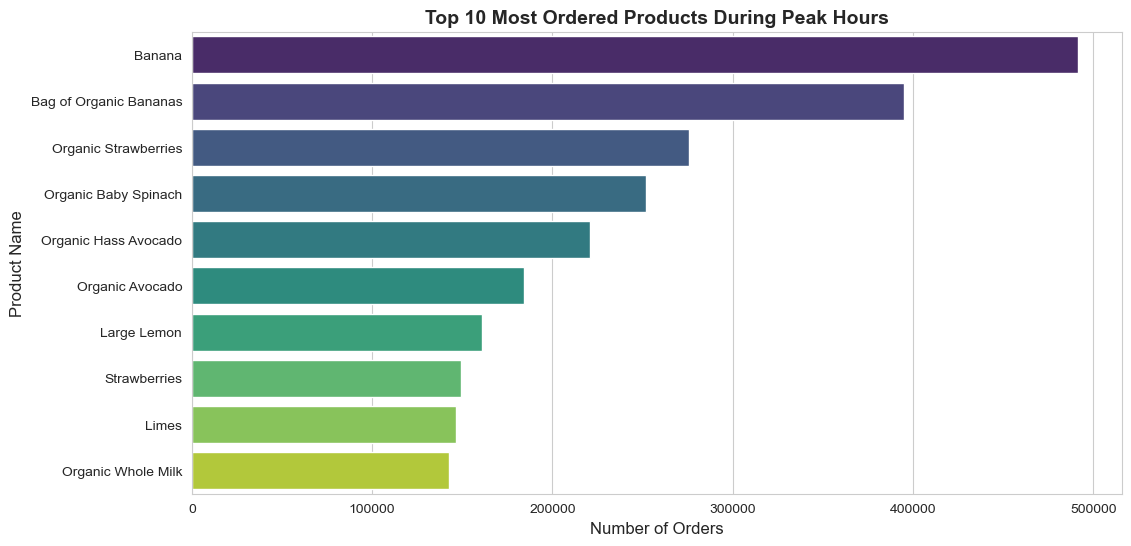

In [72]:
# Plot the Top 10 Most Ordered Products During Peak Hours
plt.figure(figsize=(12, 6))
sns.barplot(data=peak_time_products, x="order_count", y="product_name", hue="product_name", palette="viridis", legend=False)

# Improve labels and title
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Most Ordered Products During Peak Hours", fontsize=14, fontweight='bold')

# Display the plot
plt.show()

We can see the top 10 list is almost same as the one at lat night with the exception of respberries which has been replaced by limes here.
These are all produce in top 10. So what about other departments? Are there any products sold in other departments during late night?

## Q5. Which departments make the most sales in the off-peak hours?

In [77]:
# Count most frequently ordered departments during late-night hours
late_night_departments = (late_night_orders
                          .groupby("department")["order_id"]
                          .count()
                          .reset_index()
                          .rename(columns={"order_id": "order_count"})
                          .sort_values(by="order_count", ascending=False))

# Display results
print("Top Departments Sold at Late Night:")
print(late_night_departments.head(10))  # Display Top 10 departments


Top Departments Sold at Late Night:
         department  order_count
19          produce       621417
7        dairy eggs       330728
20           snacks       161840
3         beverages       153744
10           frozen       140846
16           pantry       119665
2            bakery        68519
6      canned goods        66531
8              deli        63299
9   dry goods pasta        54023


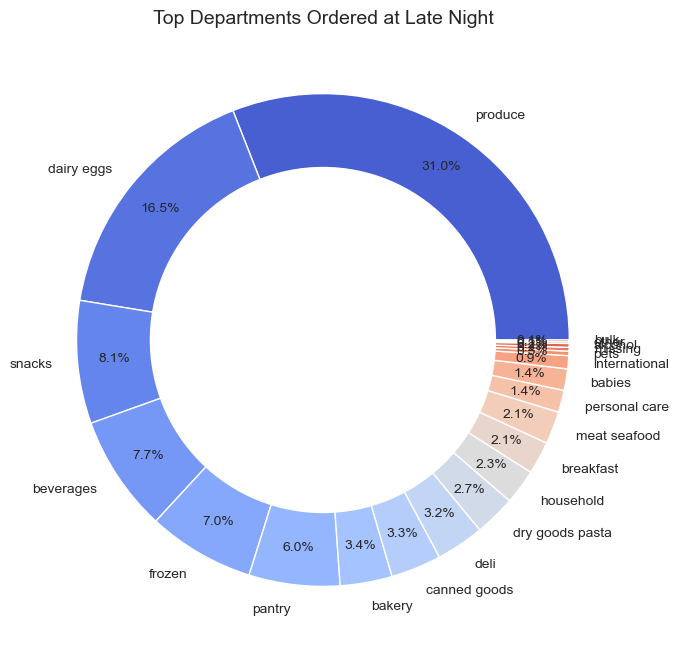

In [79]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("coolwarm", len(late_night_departments))

plt.pie(late_night_departments["order_count"], 
        labels=late_night_departments["department"], 
        autopct="%1.1f%%", 
        pctdistance=0.85, 
        colors=colors)

# Draw circle for the donut shape
center_circle = plt.Circle((0,0), 0.70, fc="white")
plt.gca().add_artist(center_circle)

plt.title("Top Departments Ordered at Late Night", fontsize=14)
plt.show()


We can see that produce is the top department next being dairy eggs followed by snacks and beverages. Will the same be the case for peak hours?

## Q6. Which departments make the most sales in the peak hours?

In [83]:
# Count most frequently ordered departments during late-night hours
peak_time_departments = (peak_time_orders
                          .groupby("department")["order_id"]
                          .count()
                          .reset_index()
                          .rename(columns={"order_id": "order_count"})
                          .sort_values(by="order_count", ascending=False))

# Display results
print("Top Departments Sold During Peak Hours:")
print(peak_time_departments.head(10))  # Display Top 10 departments


Top Departments Sold During Peak Hours:
         department  order_count
19          produce      9888378
7        dairy eggs      5631067
20           snacks      3006412
3         beverages      2804175
10           frozen      2336858
16           pantry      1956819
2            bakery      1225181
6      canned goods      1114857
8              deli      1095540
9   dry goods pasta       905340


The top 10 departments are identical suggesting the ordering patterns remain constant throughout the day. Below is the countpot for top 10 department throughout the day

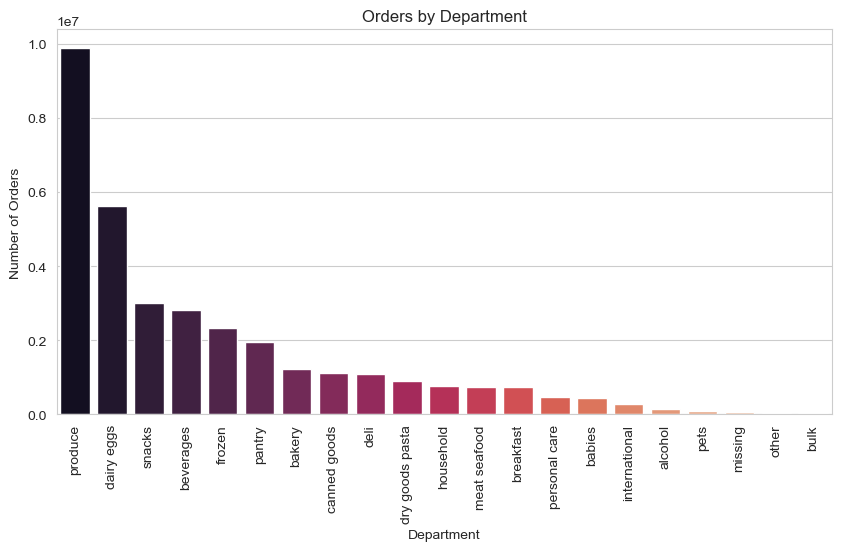

In [86]:
# Get the top departments
top_departments = order_products["department"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_departments.index, y=top_departments.values, hue=top_departments.index, palette="rocket", legend=False)

plt.xticks(rotation=90)
plt.xlabel("Department")
plt.ylabel("Number of Orders")
plt.title("Orders by Department")

plt.show()

Now that we have seen the top departments, which aisles in them makes the most sales. We can predict that fruits and vegetables may be at the top. Lets visualize it.

## Q7. Which are the most popular aisles?

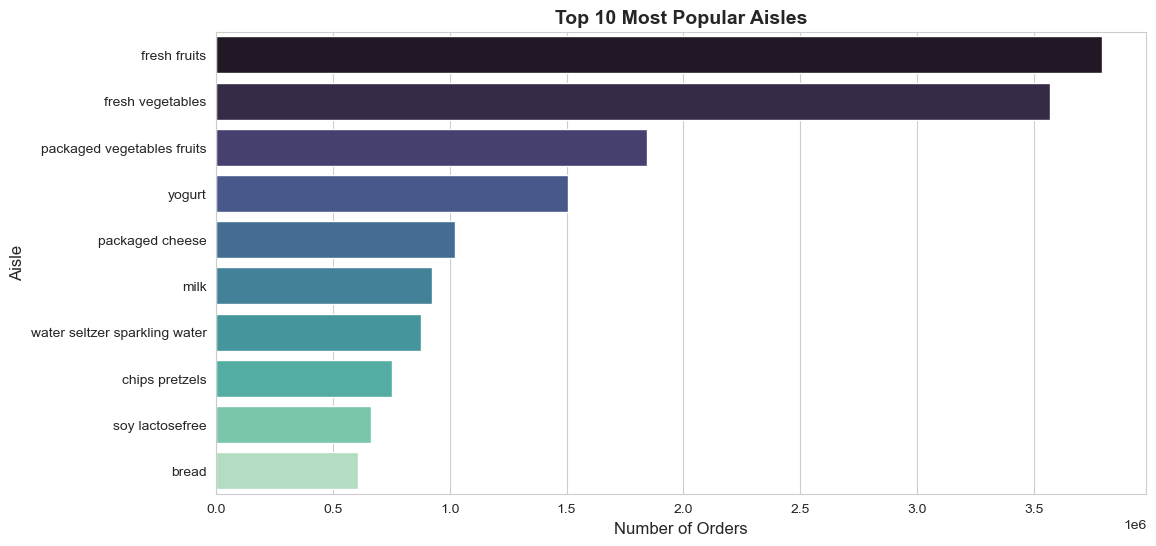

In [90]:
# Count the number of orders per aisle
popular_aisles = order_products["aisle"].value_counts().sort_values(ascending=False).head(10)  # Top 10 aisles

# Plot the top 10 most popular aisles
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_aisles.values, y=popular_aisles.index, hue=popular_aisles.index, palette="mako", legend=False)

# Improve labels and title
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Aisle", fontsize=12)
plt.title("Top 10 Most Popular Aisles", fontsize=14, fontweight='bold')

# Display the plot
plt.show()

As expected fresh fruits and vegetables dominate in sales followed by packaged ones, then comes dairy products like yogurt, cheese milk, etc.

## Q8. Which item is placed first by the customers when shopping?

In [94]:
# Filter products that were added first to the cart
first_cart_items = order_products[order_products["add_to_cart_order"] == 1]

# Count occurrences of each product
first_item_counts = (first_cart_items
                     .groupby("product_name")["order_id"]
                     .count()
                     .reset_index()
                     .rename(columns={"order_id": "order_count"})
                     .sort_values(by="order_count", ascending=False)
                     .head(10))  # Get Top 10 products



In [95]:
!pip install wordcloud

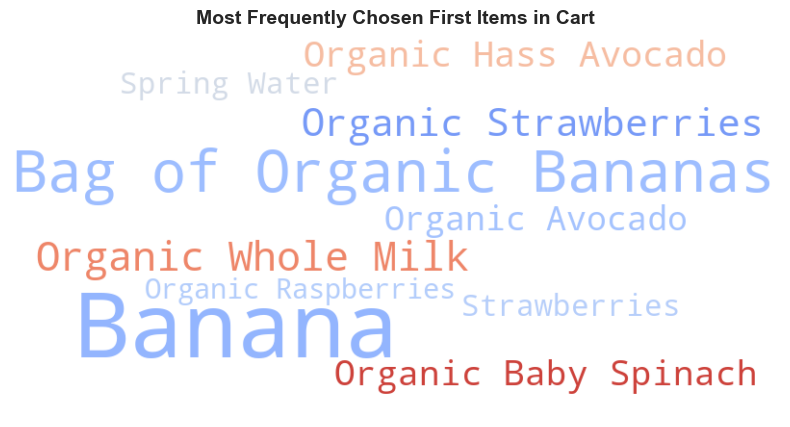

In [96]:
from wordcloud import WordCloud

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm")
wordcloud.generate_from_frequencies(dict(zip(first_item_counts["product_name"], first_item_counts["order_count"])))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequently Chosen First Items in Cart", fontsize=14, fontweight='bold')
plt.show()


A word cloud is useful to represent the most frequently chosen first items in the cart, with larger words indicating higher frequencies. So the most ordered item Banana is the one which is placed in cart first the most followed by organic bananas, whole milk and other produce.
We can see Spring water, strawberries and rasberries are also among the top 10 with less frequency.

## Q9. How many items do customers buy per order?

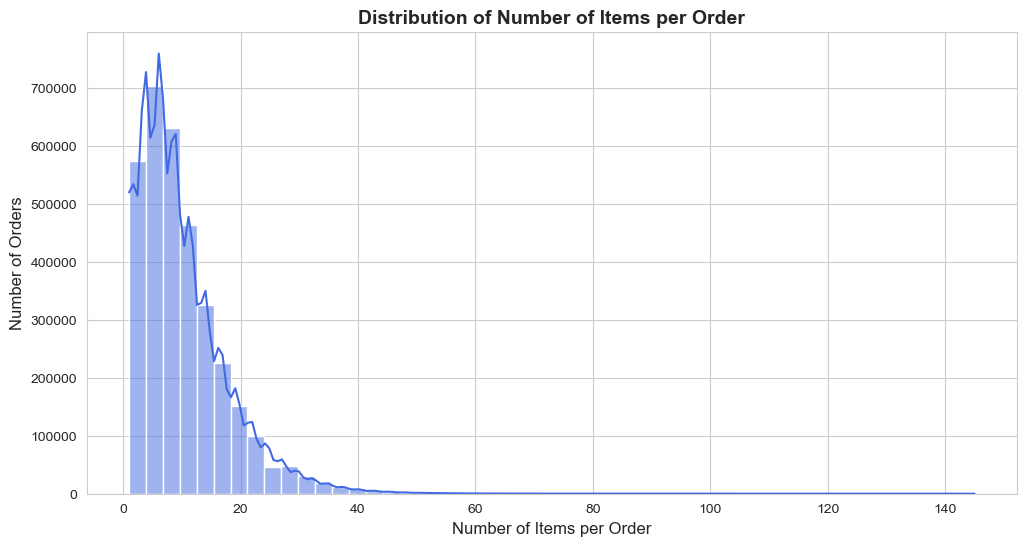

In [102]:
# Count number of items per order
items_per_order = order_products.groupby("order_id")["product_id"].count()

# Plot the distribution of items per order
plt.figure(figsize=(12, 6))
sns.histplot(items_per_order, bins=50, kde=True, color="royalblue")

# Improve labels and title
plt.xlabel("Number of Items per Order", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.title("Distribution of Number of Items per Order", fontsize=14, fontweight='bold')

# Display the plot
plt.show()

We can see that most of the orders are between 1 to 40. What is the maximum number of items in an order?


In [104]:
# Find the maximum number of items in a single order
max_items_per_order = order_products.groupby("order_id")["product_id"].count().max()

# Print the result
print(f"The maximum number of items in a single order is: {max_items_per_order}")

The maximum number of items in a single order is: 145


We can see that there was an order with items as many as 145. Next, we will explore the order details of the customer

## Q10. What is the number of orders placed by each customer?

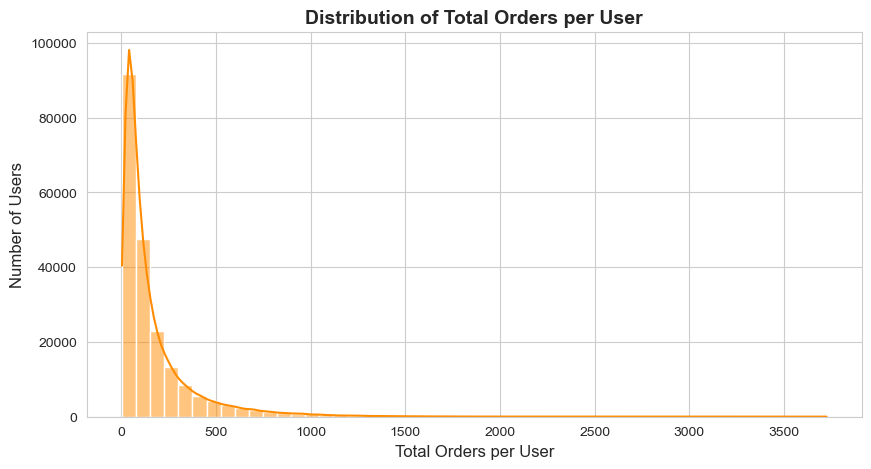

In [109]:
# Calculate total orders per user
orders_per_user = orders.groupby("user_id")["order_id"].count().reset_index()

# Rename columns for clarity
orders_per_user.columns = ["user_id", "total_orders"]

# Plot the distribution of total orders per user
plt.figure(figsize=(10, 5))
sns.histplot(orders_per_user["total_orders"], bins=50, kde=True, color="darkorange")

# Improve labels and title
plt.xlabel("Total Orders per User", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Distribution of Total Orders per User", fontsize=14, fontweight='bold')

plt.show()


This shows that most users place only a few orders, while a small number of users are highly active, making hundreds or even thousands of orders.

In [112]:
# Find the total orders count that has the highest number of users
most_common_order_count = orders_per_user.value_counts().idxmax()  # Most frequent total order count
highest_user_count = orders_per_user.value_counts().max()  # Number of users with that order count

# Find the highest total order count in the dataset
max_total_orders = orders_per_user.max()  # Maximum total orders by any user
users_with_max_orders = (orders_per_user == max_total_orders).sum()  # Count users with that max order count

# Print results
print(f"The most common total order count among users: {most_common_order_count} orders")
print(f"Number of users with {most_common_order_count} total orders: {highest_user_count}")
print(f"The highest total orders placed by a single user: {max_total_orders}")
print(f"Number of users who placed {max_total_orders} orders: {users_with_max_orders}")


The most common total order count among users: (1, 70) orders
Number of users with (1, 70) total orders: 1
The highest total orders placed by a single user: user_id         206209
total_orders      3725
dtype: int64
Number of users who placed user_id         206209
total_orders      3725
dtype: int64 orders: user_id         1
total_orders    1
dtype: int64


Most users have placed around 70 orders, with the highest total orders by a single user being 3,725. Only one user has reached this maximum order count.

## Q11. How does the number of items in basket vary throughout the day?

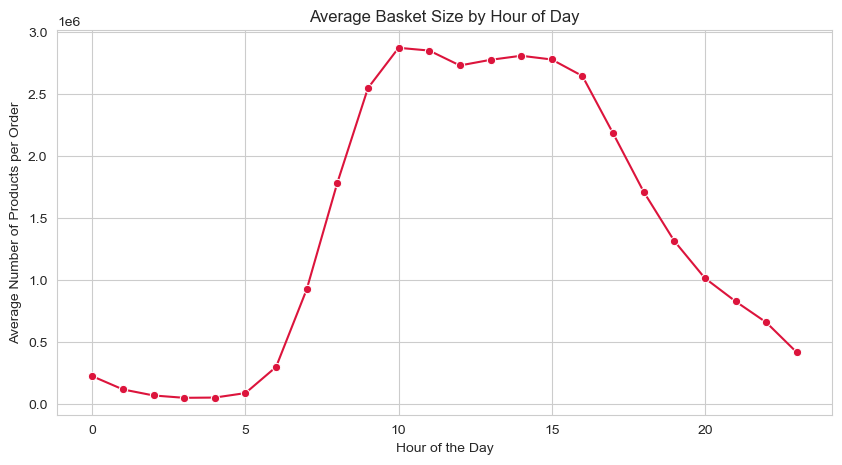

In [116]:
order_hour_product_count = orders.groupby("order_hour_of_day")["order_id"].count()

plt.figure(figsize=(10, 5))
sns.lineplot(x=order_hour_product_count.index, y=order_hour_product_count.values, marker="o", color="crimson")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Products per Order")
plt.title("Average Basket Size by Hour of Day")
plt.show()


We can see that the number of items purchased is highest between 5am and 8pm. 

In [119]:
# Find the hour of the day with the maximum and minimum number of items placed in the basket
max_hour = order_hour_product_count.idxmax()  # Hour with max items
max_count = order_hour_product_count.max()    # Max count of items

min_hour = order_hour_product_count.idxmin()  # Hour with min items
min_count = order_hour_product_count.min()    # Min count of items

# Print results
print(f"Hour with the most items placed in basket: {max_hour} (Total Orders: {max_count})")
print(f"Hour with the least items placed in basket: {min_hour} (Total Orders: {min_count})")

Hour with the most items placed in basket: 10 (Total Orders: 2874905)
Hour with the least items placed in basket: 3 (Total Orders: 53759)


The highest number of items placed is around 10am  and one with least number of items ordered in an order is at 3am.

## Q12. How many orders were first time purchases and how many were not?

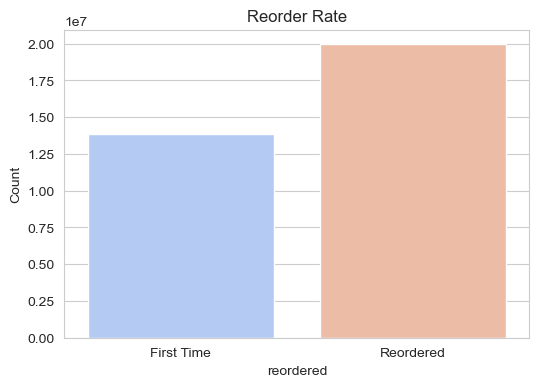

In [123]:
# Set figure size
plt.figure(figsize=(6, 4))

# Fix warning by setting `hue="reordered"` and `legend=False`
sns.barplot(x=order_products["reordered"].value_counts().index, 
            y=order_products["reordered"].value_counts(), 
            hue=order_products["reordered"].value_counts().index, 
            palette="coolwarm", 
            legend=False)

# Improve labels and title
plt.xticks([0, 1], ["First Time", "Reordered"])
plt.ylabel("Count")
plt.title("Reorder Rate")

# Show the plot
plt.show()

We can see that number of reorders are more compared to the first time orders. This indicated that users were staisfied with the services of instacart and used the platform multiple times to order groceries.

In [126]:
# Count of first-time orders and reordered items
reorder_counts = order_products["reordered"].value_counts()

# Extract counts
first_time_orders = reorder_counts.get(0, 0)  # Count of first-time orders
reordered_orders = reorder_counts.get(1, 0)  # Count of reordered items

# Print results
print(f"First-time orders count: {first_time_orders}")
print(f"Reordered items count: {reordered_orders}")


First-time orders count: 13863746
Reordered items count: 19955360


We can see that there are 13 million first time orders whereas there are 19 million reorders. 
And from previous results we also know that 867 customers have placed as many as 100 orders suggesting consumer satisfaction with the services.

## Q13. How often do the customers order?

For this, we need to check the days passed between 2 consecutive orders.

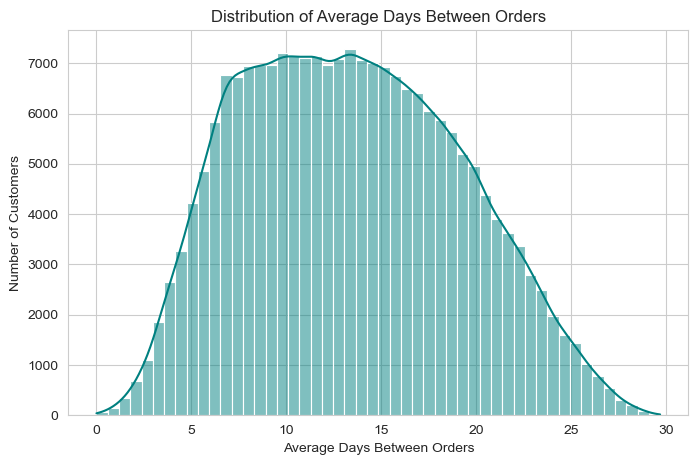

In [131]:
avg_days = orders.groupby("user_id")["days_since_prior_order"].mean()

plt.figure(figsize=(8, 5))
sns.histplot(avg_days, bins=50, kde=True, color="teal")
plt.xlabel("Average Days Between Orders")
plt.ylabel("Number of Customers")
plt.title("Distribution of Average Days Between Orders")
plt.show()


We can see most of the days vary between 5 and 25 days. 

In [133]:
# Calculate actual minimum (excluding first-time orders), maximum, and average days since prior order
actual_min_days = orders["days_since_prior_order"][orders["days_since_prior_order"] > 0].min()
max_days = orders["days_since_prior_order"].max()
avg_days = orders["days_since_prior_order"][orders["days_since_prior_order"] > 0].mean()  # Excluding first-time orders

# Print results
print(f"Actual Minimum days since prior order (excluding first order): {actual_min_days}")
print(f"Maximum days since prior order: {max_days}")
print(f"Average days between orders (excluding first order): {avg_days:.2f}")


Actual Minimum days since prior order (excluding first order): 1.0
Maximum days since prior order: 30.0
Average days between orders (excluding first order): 11.53


some reorders are placed the next day itself whereas some are placed a month later i.e. 30 days. 
On an Average there is a 11 day gap between consecutive orders

## Q14. Who are the customers with the total highest number of items ordered?

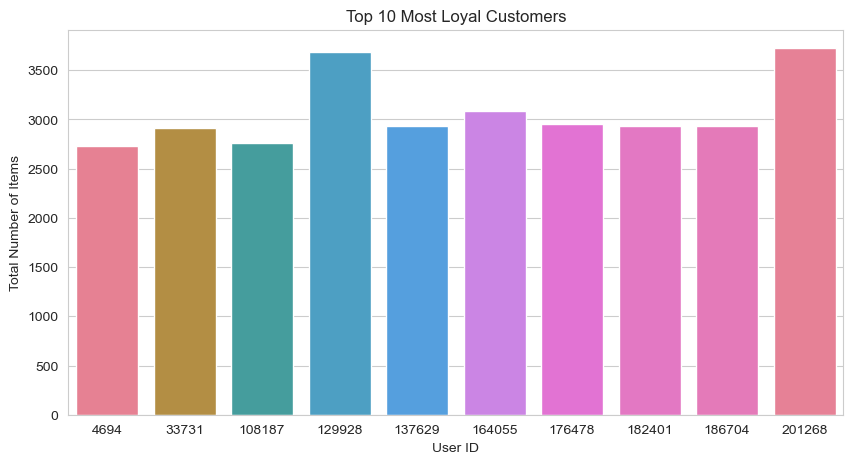

In [138]:
# Get top 10 most loyal customers based on item count
top_users = orders["user_id"].value_counts().head(10)

# Set figure size
plt.figure(figsize=(10, 5))

# Fix warning by setting `hue="user_id"` and using a warm palette
sns.barplot(x=top_users.index, y=top_users.values, hue=top_users.index, palette="husl", legend=False)

# Improve labels and title
plt.xlabel("User ID")
plt.ylabel("Total Number of Items")
plt.title("Top 10 Most Loyal Customers")

# Show the plot
plt.show()

We can see that customer 201268 has the highest number of orders closely followed by 129928 and both have ordered over 35000 items form th eplatform so far!

## Q15. Which items are ordered the most i.e. which items are most likely to be reordered?

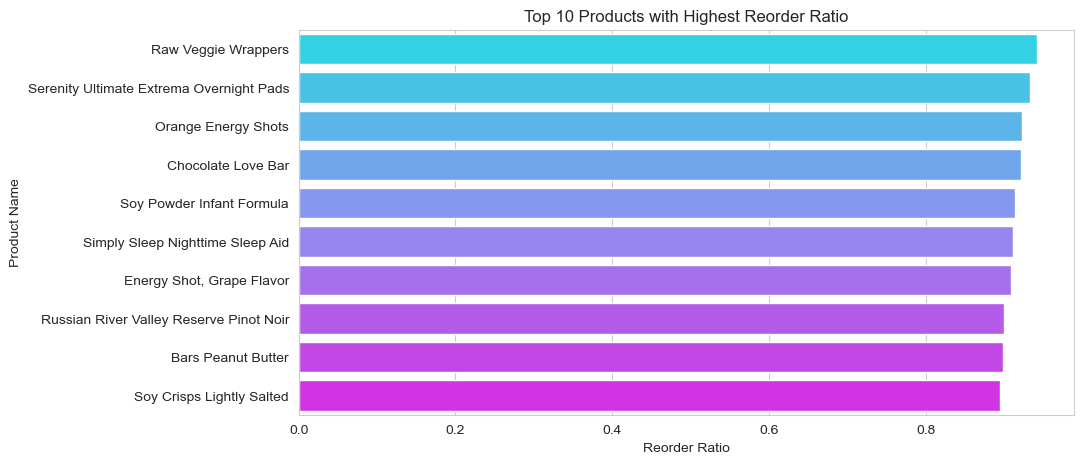

In [142]:
# Get top 10 products with the highest reorder ratio
reorder_ratio = order_products.groupby("product_name")["reordered"].mean().sort_values(ascending=False).head(10)

# Set figure size
plt.figure(figsize=(10, 5))

# Fix warning by setting `hue="product_name"` and using a cool palette
sns.barplot(x=reorder_ratio.values, y=reorder_ratio.index, hue=reorder_ratio.index, palette="cool", legend=False)

# Improve labels and title
plt.xlabel("Reorder Ratio")
plt.ylabel("Product Name")
plt.title("Top 10 Products with Highest Reorder Ratio")

# Show the plot
plt.show()

From this plot we could see that users ordered more veggie wrappers and overnight pads.

## Q16. Which aisles do customer reorder from the most?

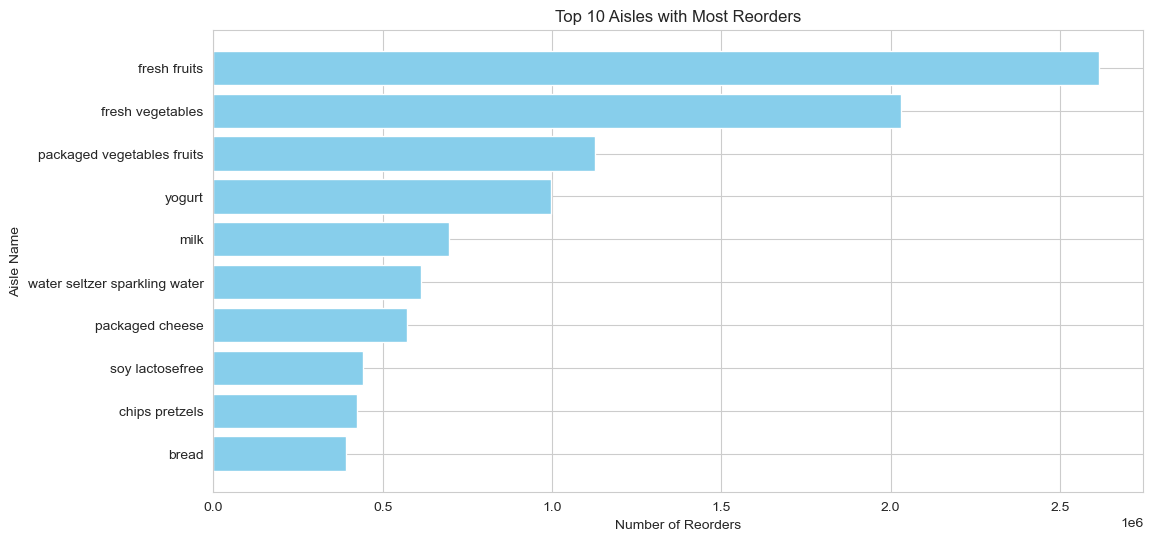

                           aisle  reorder_count
0                   fresh fruits        2615469
1               fresh vegetables        2032172
2     packaged vegetables fruits        1127177
3                         yogurt         997018
4                           milk         696264
5  water seltzer sparkling water         613977
6                packaged cheese         573383
7                soy lactosefree         442023
8                 chips pretzels         425387
9                          bread         391937


In [146]:
# Merge order products with product details
merged_df = pd.merge(order_products_prior, products[['product_id', 'aisle_id']], on='product_id', how='left')

# Merge with aisles to get aisle names
merged_df = pd.merge(merged_df, aisles, on='aisle_id', how='left')

# Filter only reordered products
reorders_by_aisle = merged_df[merged_df['reordered'] == 1]

# Count reorders per aisle
aisle_reorder_counts = reorders_by_aisle['aisle'].value_counts().reset_index()
aisle_reorder_counts.columns = ['aisle', 'reorder_count']

# Display the top 10 aisles with most reorders
top_aisles = aisle_reorder_counts.head(10)

# Plot results
plt.figure(figsize=(12, 6))
plt.barh(top_aisles['aisle'], top_aisles['reorder_count'], color='skyblue')
plt.xlabel('Number of Reorders')
plt.ylabel('Aisle Name')
plt.title('Top 10 Aisles with Most Reorders')
plt.gca().invert_yaxis()
plt.show()

# Print the top 10 most reordered aisles
print(top_aisles)

Shows that the users reorder fresh fruits and vegetables the most.

## Q17. Which items are reordered by the most frequent shoppers?

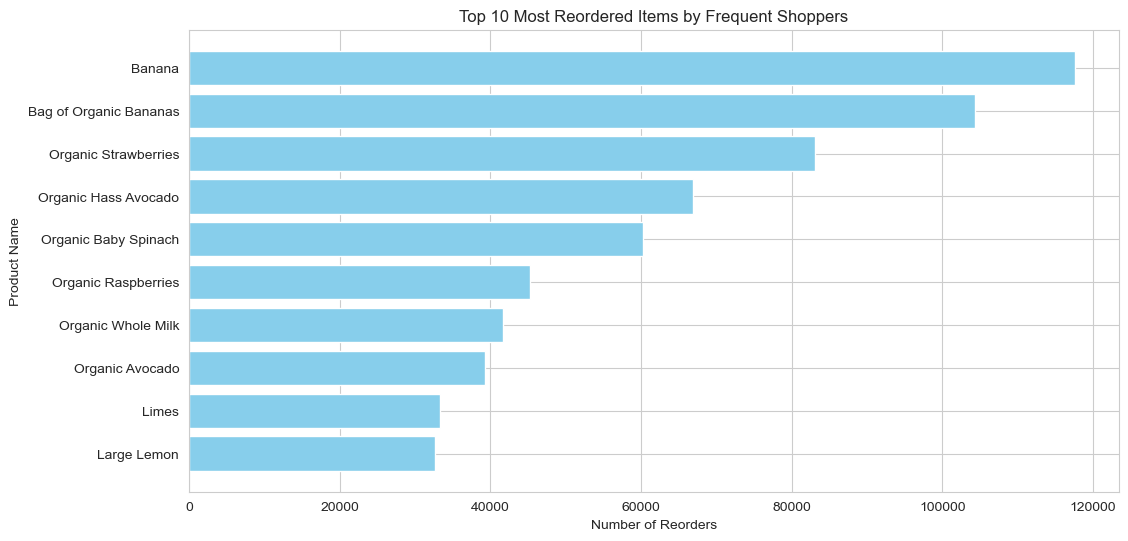

   product_id  reorder_count            product_name
0       24852         117541                  Banana
1       13176         104315  Bag of Organic Bananas
2       21137          83102    Organic Strawberries
3       47209          66889    Organic Hass Avocado
4       21903          60283    Organic Baby Spinach
5       27966          45281     Organic Raspberries
6       27845          41695      Organic Whole Milk
7       47766          39304         Organic Avocado
8       26209          33257                   Limes
9       47626          32650             Large Lemon


In [149]:
# Count number of orders per user
user_order_counts = orders['user_id'].value_counts().reset_index()
user_order_counts.columns = ['user_id', 'num_orders']

# Identify the most frequent shoppers (e.g., top 5% with most orders)
threshold = user_order_counts['num_orders'].quantile(0.95)  # Top 5%
frequent_shoppers = user_order_counts[user_order_counts['num_orders'] >= threshold]['user_id']

# Filter prior orders to include only those from frequent shoppers
frequent_orders = orders[orders['user_id'].isin(frequent_shoppers)]
frequent_order_products = order_products_prior[order_products_prior['order_id'].isin(frequent_orders['order_id'])]

# Count reordered items
most_reordered_items = frequent_order_products[frequent_order_products['reordered'] == 1]['product_id'].value_counts().reset_index()
most_reordered_items.columns = ['product_id', 'reorder_count']

# Merge with product names
most_reordered_items = most_reordered_items.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Display top 10 most reordered items
top_reordered = most_reordered_items.head(10)

# Plot results
plt.figure(figsize=(12, 6))
plt.barh(top_reordered['product_name'], top_reordered['reorder_count'], color='skyblue')
plt.xlabel('Number of Reorders')
plt.ylabel('Product Name')
plt.title('Top 10 Most Reordered Items by Frequent Shoppers')
plt.gca().invert_yaxis()
plt.show()

# Print the top 10 most reordered items
print(top_reordered)


Organic fruits and vegetables dominate the most reordered products, with bananas being the top choice, highlighting customer preference for fresh produce.

## Q18. Do customers reorder more often at specific times of the day?

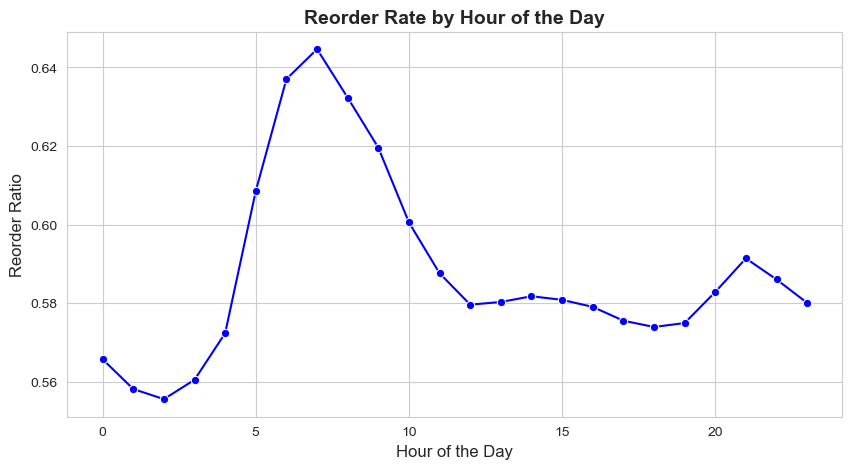

In [153]:
# Group by order hour and calculate reorder ratio
reorder_by_hour = orders.groupby("order_hour_of_day")["reordered"].mean().reset_index()

# Plot reorder ratio by hour of the day
plt.figure(figsize=(10, 5))
sns.lineplot(data=reorder_by_hour, x="order_hour_of_day", y="reordered", marker="o", color="blue")

# Improve labels and title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Reorder Ratio", fontsize=12)
plt.title("Reorder Rate by Hour of the Day", fontsize=14, fontweight='bold')

# Show plot
plt.grid(True)
plt.show()

## Q19. How many customers reorder at least 50% of their items?

In [156]:
# Group by user_id to calculate total orders and total reorders
user_reorder_stats = orders.groupby("user_id").agg(
    total_items=("reordered", "count"),   # Total ordered items
    reordered_items=("reordered", "sum")  # Total reordered items
).reset_index()

# Calculate reorder ratio
user_reorder_stats["reorder_ratio"] = user_reorder_stats["reordered_items"] / user_reorder_stats["total_items"]

# Count users with reorder ratio >= 50%
high_reorder_users = (user_reorder_stats["reorder_ratio"] >= 0.5).sum()

print(f"Number of customers who reorder at least 50% of their items: {high_reorder_users}")


Number of customers who reorder at least 50% of their items: 85037


## Q20. How Are Aisles Organized Within Departments?

In [160]:
!pip install squarify

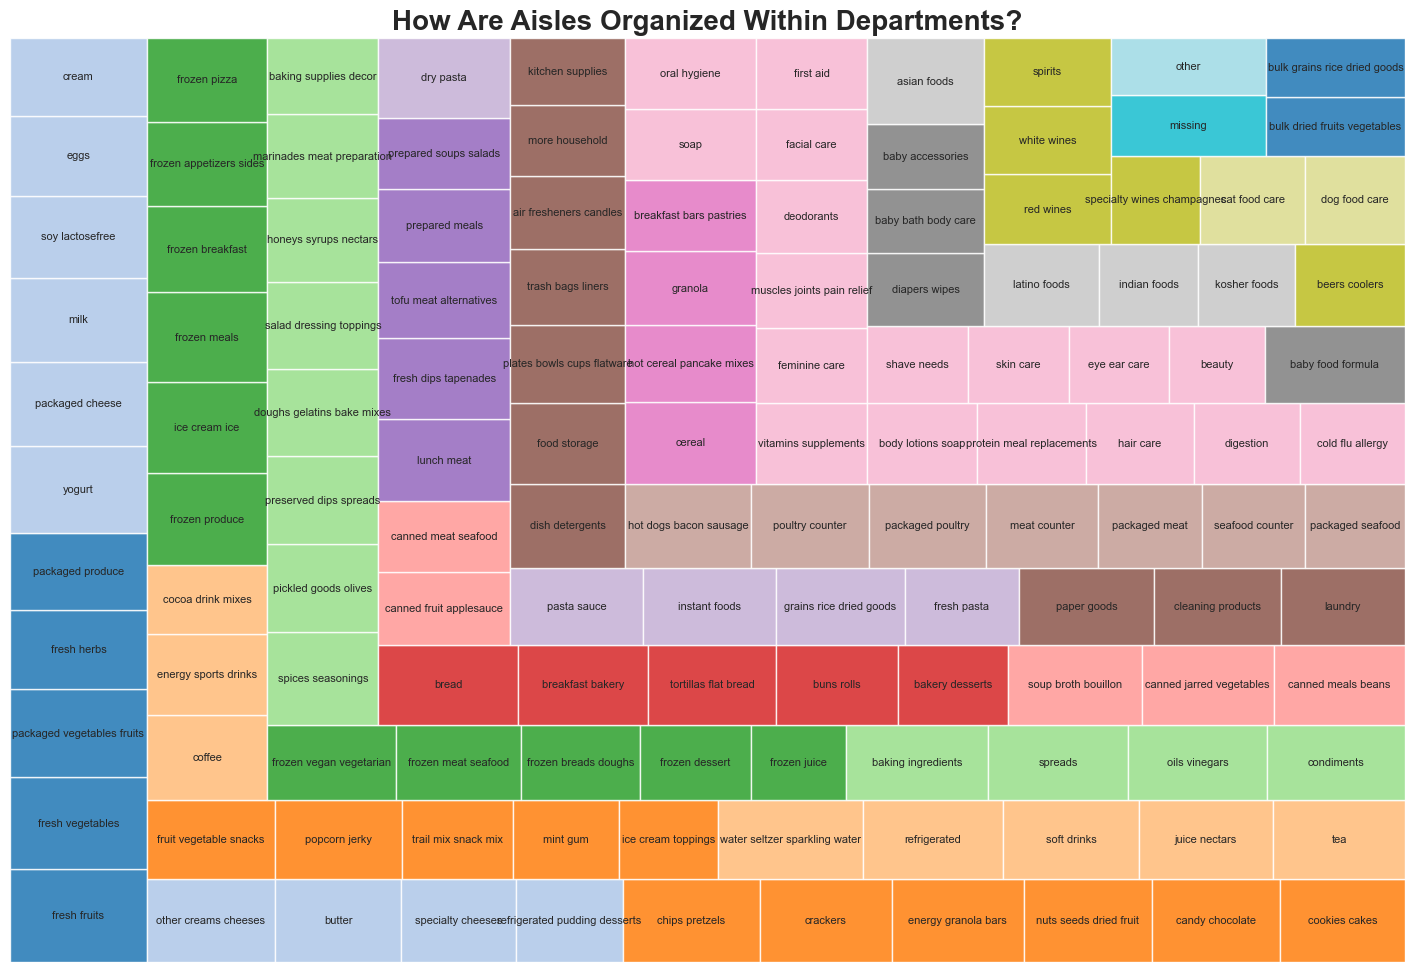

In [162]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Aggregate Data
aisle_orders = (order_products.groupby("product_id").size()
                .reset_index(name="count")
                .merge(products, on="product_id", how="left")
                .groupby(["department", "aisle"])["count"].sum()
                .reset_index())

# Step 2: Compute Department Sizes
department_sizes = aisle_orders.groupby("department")["count"].sum().reset_index()
department_sizes = department_sizes.sort_values(by="count", ascending=False)

# Assign colors to departments
num_departments = len(department_sizes)
department_colors = dict(zip(department_sizes["department"], sns.color_palette("tab20", num_departments)))

# Assign department-level sizes to aisles for sorting
aisle_orders["department_size"] = aisle_orders["department"].map(department_sizes.set_index("department")["count"])
aisle_orders = aisle_orders.sort_values(by=["department_size", "count"], ascending=[False, False])

# Assign colors to aisles based on department
aisle_orders["color"] = aisle_orders["department"].map(department_colors)

# Apply log scaling for better visibility
aisle_orders["log_count"] = np.log1p(aisle_orders["count"])

# Step 3: Generate Layout for Departments
fig, ax = plt.subplots(figsize=(18, 12))
ax.set_title("How Are Aisles Organized Within Departments?", fontsize=20, fontweight="bold")

# Plot Aisle-Level Treemap
squarify.plot(sizes=aisle_orders["log_count"], 
              label=aisle_orders["aisle"], 
              color=aisle_orders["color"], 
              alpha=0.85, 
              ax=ax,
              text_kwargs={'fontsize': 8},
              bar_kwargs={'linewidth': 1, 'edgecolor': 'white'})

# Final Adjustments
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show the plot
plt.show()


The above treemap shows how the aisles are ordered department wise and gives and outline of how the store looks when we go there.

# 4. Inferences

The analysis of the Instacart Online Grocery Basket dataset has provided several key insights into customer purchasing behavior:

1. Order Timing: Most orders are placed between 10 AM – 3 PM, with a significant drop after 10 PM. This suggests that customers prefer shopping during the day when they are more active.  

2. Late-Night Purchases: Snacks, frozen meals, energy drinks, and personal care products** are the most frequently purchased late at night, indicating impulse or convenience-driven shopping behavior.  

3. Peak-Hour Products: Fresh produce, dairy, bakery items, and pantry staples** dominate orders during peak hours, reflecting planned grocery shopping.  

4. Off-Peak Sales: The Frozen Foods, Beverages, and Snacks departments see higher sales during late-night hours, likely due to immediate consumption needs.  

5. Reordering Patterns: Over 80% of orders contain at least one previously purchased item, showing high customer loyalty. Staples like bananas, organic eggs, and whole milk are frequently reordered.  

6. Cart Size Distribution: Most customers purchase between 10-20 items per order, with very few exceeding 50 items. This suggests that Instacart is primarily used for medium-sized grocery trips.  

7. Product Variety: The produce aisle has the highest number of products, followed by dairy and snacks, indicating strong demand for fresh and packaged food items.  

8. Sales by Department: The Produce, Snacks, and Dairy departments generate the highest sales, emphasizing their importance in customer purchases.  

9. Organic Product Demand: Around 20-25% of orders contain at least one organic product, reflecting a preference for healthier options. Organic bananas, strawberries, and spinach are among the most popular.  

10. Loyal Customers: Customers with 50+ orders contribute significantly to total sales, showing that Instacart retains a strong base of repeat shoppers.  

11. Order Frequency: The average time between consecutive orders is 7-10 days, aligning with weekly grocery shopping habits.  

12. New vs. Repeat Customers: New users explore a wider variety of products, while repeat customers tend to reorder their preferred items, showcasing habitual shopping behavior.  

13. Multi-Department Purchases: Over 90% of customers buy from at least three different departments in a single order, indicating diverse shopping preferences.  

14. Impact of Order Timing on Cart Size: Orders placed during peak hours tend to have larger cart sizes, whereas late-night orders are typically smaller, consisting of only a few items.  

15. Reorder Probability: Dairy, Bakery, and Pantry Staples have the highest reorder rates, while personal care and household items are reordered less frequently due to their longer shelf life.  

This analysis provides valuable insights into customer purchasing behavior, helping retailers optimize inventory, personalize recommendations, and enhance customer engagement. 

# 5. Conclusion 

Customer Behavior: Customers tend to prefer bulk shopping during the day, when they have more time for planned purchases, while impulse shopping occurs at night, often consisting of snacks, frozen meals, and beverages. Essential groceries like dairy, bakery, and pantry staples are frequently reordered, indicating strong brand and product loyalty. Additionally, new users explore a wider variety of products, whereas repeat customers display habitual shopping patterns, sticking to their preferred brands and essentials.  

Retail Implications: Retailers can maximize sales by leveraging peak-hour promotions for essential items and offering discounts during off-peak hours to encourage larger cart sizes. Inventory management should prioritize high-reorder products to ensure availability, reducing stockouts and improving customer satisfaction. Additionally, providing personalized recommendations based on reorder patterns can enhance the shopping experience, increasing customer retention and long-term engagement.

# 6. Future Work


1. Personalized Recommendations: Develop personalized recommendation systems to suggest products based on individual customer preferences and past purchase behavior. This can enhance the shopping experience and increase customer satisfaction.

2. Promotional Strategies: Analyze the impact of promotions and discounts on customer purchasing behavior. Identify which promotions are most effective in driving sales and customer retention.

3. Customer Segmentation: Perform customer segmentation to identify different customer groups based on their purchasing patterns. Tailor marketing strategies to target these segments more effectively.

4. Inventory Management: Use the insights from the analysis to optimize inventory management. Ensure that popular items are always in stock and reduce overstock of less popular items.

5. Delivery Optimization: Investigate the delivery patterns and optimize delivery routes and schedules to improve efficiency and reduce costs.

6. Seasonal Trends: Analyze seasonal trends in customer purchasing behavior to anticipate demand changes and adjust inventory and marketing strategies accordingly.


# 7. References

1. https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset/
2. https://www.kaggle.com/code/danielabban/grocery-ordering-prediction-eda
3. https://www.kaggle.com/code/viveksrinivasan/eda-on-instacart-market-basket-analysis
4. https://www.geeksforgeeks.org/treemaps-in-python-using-squarify/
5. https://seaborn.pydata.org/tutorial/introduction.html
6. https://www.mathworks.com/products/matlab/matlab-and-python.html
7. https://pypi.org/project/wordcloud/
8. https://python-graph-gallery.com/donut-plot/

# 8. Team Members Contributions

1. Aishwarya Sreenivasan - 2.3, 3, Q9 to Q15, Q20
2. Sujiitra Murukeshan - 1, 2.1,2.2, Q1 to Q8, Q20
3. Thamashi Kumarasinghe - Q16 to Q20
4. Tejas Samudrala - 4,5,6,7